In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import geopy

In [2]:
with open('Data/CLEAN_GVA.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

In [3]:
df.head()

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,year,month
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,2014,2014-01
4,92122,NaN,Victim,NaN,Unharmed,NaN,NaN,2014-01-01,Virginia,Falls Church,NaN,2014,2014-01


In [12]:
clean_df = df

In [14]:
clean_df.head()

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,year,month
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,2014,2014-01
4,92122,NaN,Victim,NaN,Unharmed,NaN,NaN,2014-01-01,Virginia,Falls Church,NaN,2014,2014-01


In [15]:
df['date'].sort_values()

196447    2013-01-01
196450    2013-01-01
196449    2013-01-01
196448    2013-01-01
188359    2013-01-01
             ...    
449552    2018-03-31
449548    2018-03-31
449547    2018-03-31
449545    2018-03-31
449786    2018-03-31
Name: date, Length: 449787, dtype: object

In [18]:
clean_df.dtypes

incident_id      int64
age            float64
type            object
gender          object
status          object
gun_stolen      object
gun_type        object
date            object
state           object
city            object
number_guns    float64
year             int64
month           object
dtype: object

In [26]:
clean_df = clean_df.rename(columns= {"year":"Year"})

In [27]:
clean_df.head()

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,Year,month
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,2014,2014-01
4,92122,NaN,Victim,NaN,Unharmed,NaN,NaN,2014-01-01,Virginia,Falls Church,NaN,2014,2014-01


In [20]:
with open('Data/ACS_2013-2019_Cleaning.csv',encoding='Latin1') as f:
    df2=pd.read_csv(f, delimiter=',')
    

In [21]:
df2.head()

,id,Year,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Percent!!SEX AND AGE!!Total population!!Female
0,1,2019,Alabama,4903185,2369611,48.3,2533574,51.7
1,2,2019,Alaska,731545,380433,52.0,351112,48.0
2,3,2019,Arizona,7278717,3620935,49.7,3657782,50.3
3,4,2019,Arkansas,3017804,1474705,48.9,1543099,51.1
4,5,2019,California,39512223,19640794,49.7,19871429,50.3


In [22]:
census_state_df = df2
census_state_df = census_state_df.rename(columns ={"Geographic Area Name":"state","Estimate!!SEX AND AGE!!Total population":"Total Population","Estimate!!SEX AND AGE!!Total population!!Male":"Male Population","Percent!!SEX AND AGE!!Total population!!Male":"Percent Male Population","Estimate!!SEX AND AGE!!Total population!!Female":"Female Population","Percent!!SEX AND AGE!!Total population!!Female":"Percent Female Population"})
census_state_df.head()

,id,Year,state,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,1,2019,Alabama,4903185,2369611,48.3,2533574,51.7
1,2,2019,Alaska,731545,380433,52.0,351112,48.0
2,3,2019,Arizona,7278717,3620935,49.7,3657782,50.3
3,4,2019,Arkansas,3017804,1474705,48.9,1543099,51.1
4,5,2019,California,39512223,19640794,49.7,19871429,50.3


In [23]:
census_state_df.dtypes

id                             int64
Year                           int64
state                         object
Total Population               int64
Male Population                int64
Percent Male Population      float64
Female Population              int64
Percent Female Population    float64
dtype: object

In [24]:
census_state_df['state'].sort_values()

0      Alabama
312    Alabama
52     Alabama
208    Alabama
156    Alabama
        ...   
258    Wyoming
310    Wyoming
102    Wyoming
362    Wyoming
154    Wyoming
Name: state, Length: 364, dtype: object

In [28]:
merged_df = pd.merge(clean_df,
                     census_state_df[['Year','state','Total Population','Male Population',
                                      'Percent Male Population','Female Population','Percent Female Population']], 
                     on =['state','Year'])

In [29]:
merged_df.head()

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,Year,month,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01,4383272,2156251,49.2,2227021,50.8
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01,4383272,2156251,49.2,2227021,50.8
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8
4,92165,22.0,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Elliott County,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8


In [30]:
merged_df ['total_population_weighted_by_state'] = merged_df.apply(lambda x: 100000/x['Total Population'], axis = 1) 

In [31]:
merged_df.head(10)

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,Year,month,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population,total_population_weighted_by_state
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
4,92165,22.0,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Elliott County,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
5,92165,58.0,Subject-Suspect,Male,NaN,NaN,NaN,2014-01-01,Kentucky,Elliott County,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
6,92183,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
7,92183,NaN,Subject-Suspect,Male,Unharmed,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
8,92186,NaN,Victim,Female,Injured,NaN,NaN,2014-01-01,Kentucky,Leslie County,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814
9,92186,NaN,Subject-Suspect,Male,Unharmed,NaN,NaN,2014-01-01,Kentucky,Leslie County,NaN,2014,2014-01,4383272,2156251,49.2,2227021,50.8,0.022814


In [32]:
states_total_incidents=merged_df.groupby(['state','Year']).size()
states_total_incidents_df=pd.DataFrame(states_total_incidents)
states_total_incidents_df.rename(columns = {0:"Incidents"},inplace =True)
states_total_incidents_df.head(50)

Incidents
state                Year           
Alabama              2013         15
                     2014       2554
                     2015       1921
                     2016       2525
                     2017       2876
                     2018        640
Alaska               2014        212
                     2015        661
                     2016        774
                     2017        544
                     2018         87
Arizona              2013         30
                     2014        956
                     2015        808
                     2016       1022
                     2017       1173
                     2018        267
Arkansas             2014       1182
                     2015       1003
                     2016       1359
                     2017       1540
                     2018        347
California           2013        220
                     2014       6582
                     2015       6394
                     2016       7295
                     2017       8506
                     2018       2345
Colorado             2013         13
                     2014        945
                     2015       1351
                     2016       1748
                     2017       1693
                     2018        414
Connecticut          2013         19
                     2014       1045
                     2015       1373
                     2016       1501
                     2017       1257
                     2018        279
Delaware             2013         13
                     2014        850
                     2015        640
                     2016        569
                     2017        599
                     2018        218
District of Columbia 2013         54
                     2014       1310
                     2015        839
                     2016        788

In [45]:
states_total_incidents_weighted = merged_df.groupby(['state','Year'])['total_population_weighted_by_state'].sum()
states_total_incidents_weighted_df = pd.DataFrame(states_total_incidents_weighted)
# states_total_incidents_weighted_df.rename(columns = {0:"Total Incidents In State per 100k"}, inplace = True)
# states_total_incidents_weighted_df.head(10)

In [50]:
states_total_incidents_weighted_df.columns = ['Total Incidents In State Per 100k']

In [51]:
states_total_incidents_weighted_df.head(10)

Total Incidents In State Per 100k
state   Year                                   
Alabama 2013                           0.312547
        2014                          53.013091
        2015                          39.767152
        2016                          52.156878
        2017                          59.289544
        2018                          13.156055
Alaska  2014                          29.108884
        2015                          90.131243
        2016                         105.041019
        2017                          73.656347

In [53]:
states_weighted_Year_reindexed_df= states_total_incidents_weighted_df.reset_index(level ='Year')
pivoted_total_incident_weighted_df = pd.pivot_table(data = states_weighted_Year_reindexed_df, index ="state", columns ='Year', values = 'Total Incidents In State Per 100k' )
pivoted_total_incident_weighted_df

Year,2013,2014,2015,2016,2017,2018
state,,,,,,
Alabama,0.312547,53.013091,39.767152,52.156878,59.289544,13.156055
Alaska,NaN,29.108884,90.131243,105.041019,73.656347,11.780381
Arizona,0.462984,14.569804,12.165142,15.188947,17.224806,3.843560
Arkansas,NaN,40.108095,33.905662,45.781129,51.713531,11.602747
California,0.584187,17.290603,16.641740,18.872461,21.819853,5.989973
Colorado,0.253940,18.181538,25.592424,32.616230,31.141250,7.484893
Connecticut,0.530199,29.091998,38.210831,41.827246,34.970307,7.790023
Delaware,1.431015,92.687501,69.080602,60.875473,63.471409,22.959573
District of Columbia,8.718523,206.710681,129.578492,119.573481,268.891166,81.665688


In [54]:
t_years = pivoted_total_incident_weighted_df.drop([2013,2018], axis = 1)
t_years

Year,2014,2015,2016,2017
state,,,,
Alabama,53.013091,39.767152,52.156878,59.289544
Alaska,29.108884,90.131243,105.041019,73.656347
Arizona,14.569804,12.165142,15.188947,17.224806
Arkansas,40.108095,33.905662,45.781129,51.713531
California,17.290603,16.641740,18.872461,21.819853
Colorado,18.181538,25.592424,32.616230,31.141250
Connecticut,29.091998,38.210831,41.827246,34.970307
Delaware,92.687501,69.080602,60.875473,63.471409
District of Columbia,206.710681,129.578492,119.573481,268.891166


Text(0.5, 1.0, 'Total Gun Related Incidents per 100,000 from 2013-2018')

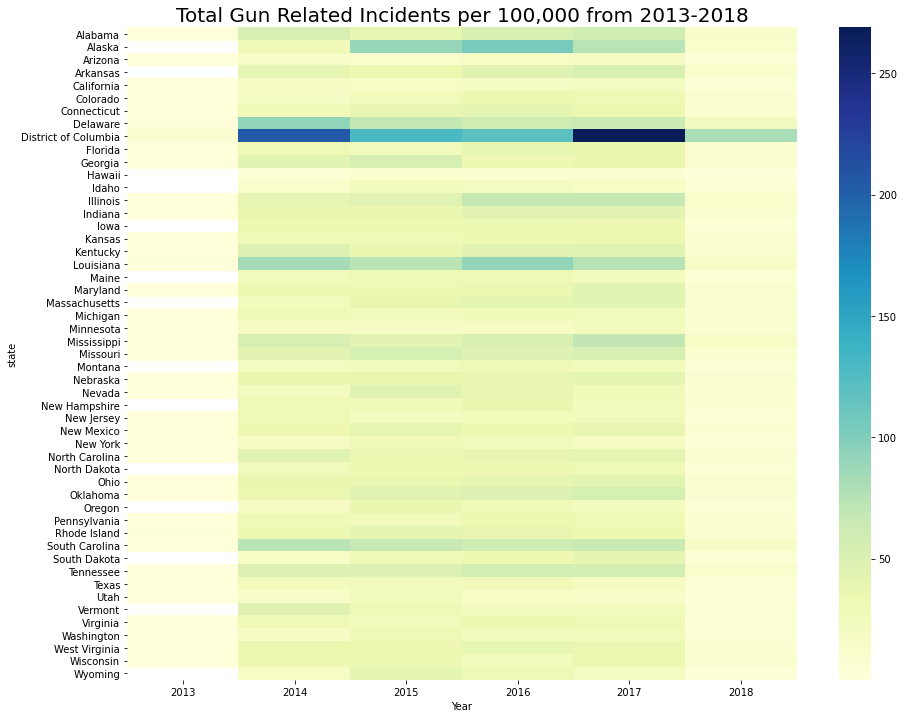

In [55]:
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(pivoted_total_incident_weighted_df, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Incidents per 100,000 from 2013-2018", fontsize  = 20)

Text(0.5, 1.0, 'Total Gun Related Incidents per 100,000 from 2014-2017')

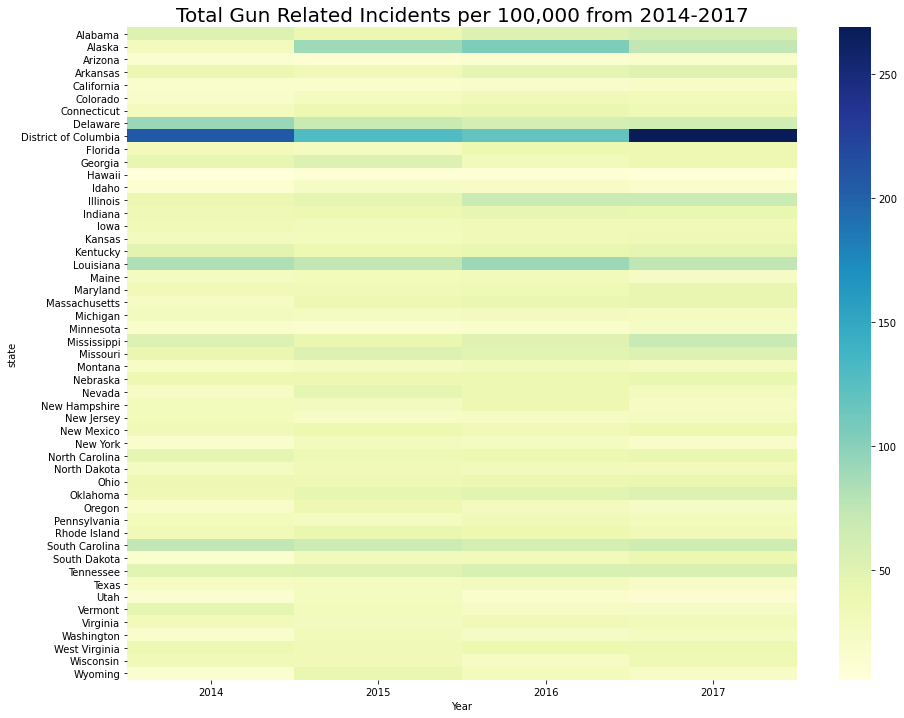

In [56]:
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(t_years, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Incidents per 100,000 from 2014-2017", fontsize  = 20)